In [1]:
import os
import pandas as pd

In [2]:
os.chdir(r'E:\personal_file\study_file\python数据分析学习\pydata-book-2nd-edition')

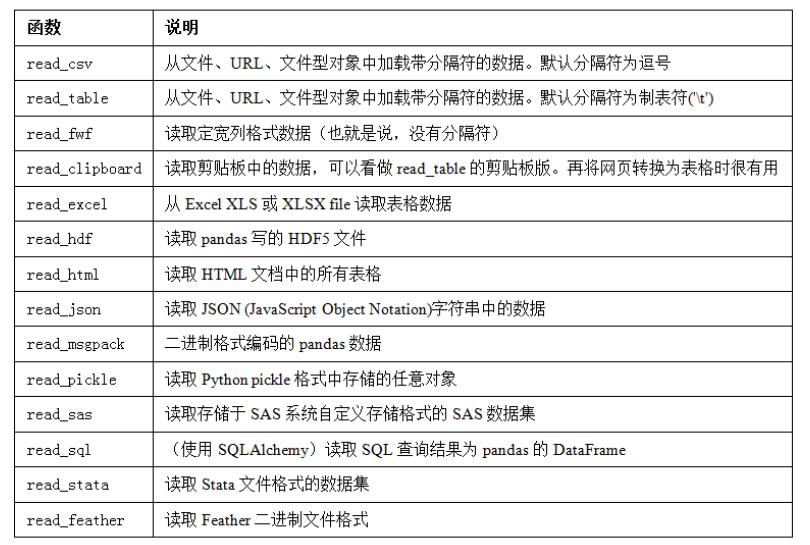

In [16]:
# https://blog.csdn.net/Super_Tiger_Lee/article/details/78075775
#注意斜杠和反斜杠
!type examples\ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [6]:
df = pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
pd.read_table('examples/ex1.csv', sep=",")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
pd.read_csv('examples/ex2.csv', header=None) #让pandas为其分配默认列名

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
pd.read_csv('examples/ex2.csv', names=['a', 'b', 'c', 'd', 'message']) #指定列名

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [12]:
#用index_col 指定某一列为索引
pd.read_csv('examples/ex2.csv', 
            names=['a', 'b', 'c', 'd', 'message'], index_col='message') 

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [20]:
#多个列做层次化索引
!type examples\csv_mindex.csv
parsed = pd.read_csv('examples/csv_mindex.csv', index_col=['key1', 'key2'])
parsed

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

##### 分隔符用正则表达式

In [32]:
list(open('examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [26]:
result = pd.read_table('examples/ex3.txt', sep="\s+")
result

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


##### 跳过文件某行 

In [28]:
!type examples\ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [29]:
pd.read_csv('examples/ex4.csv', skiprows=[0, 2, 3], skipcol)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


##### 缺失值处理

In [31]:
!type examples\ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [41]:
result = pd.read_csv('examples/ex5.csv')
print(pd.isnull(result))
result

   something      a      b      c      d  message
0      False  False  False  False  False     True
1      False  False  False   True  False    False
2      False  False  False  False  False    False


,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [44]:
# 这里的na_values有什么用？
result = pd.read_csv('examples/ex5.csv', na_values=["NULL"])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [45]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


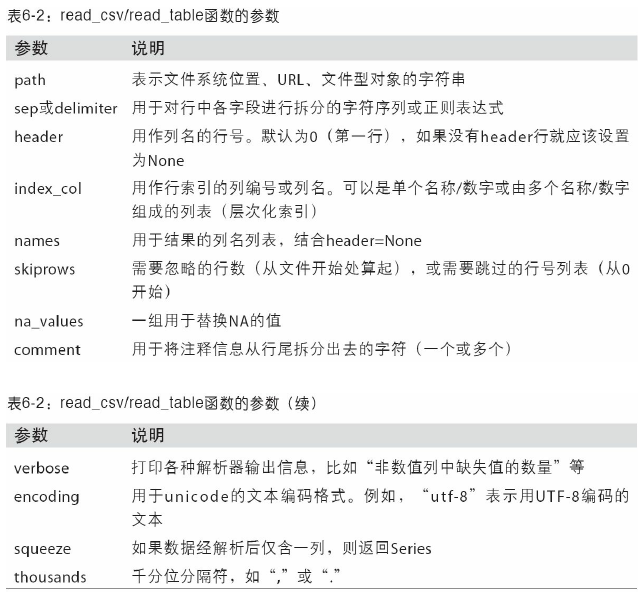

### 逐快读取文本文件

In [51]:
#设置pandas的显示紧凑一些
# https://www.yiibai.com/pandas/python_pandas_options_and_customization.html
pd.options.display.max_rows = 10

In [52]:
result = pd.read_csv('examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [53]:
pd.read_csv('examples/ex6.csv', nrows=5) #nrows指定只读取前5行

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [73]:
#书上代码文件里路径错了
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)
chunker

In [74]:
# 计算key中每个元素出现的次数,为啥第二次运行tot就输出为空series？？？？
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
tot = tot.sort_values(ascending=False)
tot

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
     ...  
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
Length: 36, dtype: float64

### 将数据写出到文本格式 

In [6]:
data = pd.read_csv('examples/ex5.csv')
data.to_csv('examples/out.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [10]:
!type examples\out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


当我们在 Python 中打印对象调用 print obj 时候，事实上是调用了 sys.stdout.write(obj+'\n')
print 将你需要的内容打印到了控制台，然后追加了一个换行符
print 会调用 sys.stdout 的 write 方法

In [15]:
import sys
print("\n将data的内容输出在控制台中，分隔符使用|")
data.to_csv(sys.stdout, sep='|')
print("\n分隔符默认为逗号，na_rep为空值替换")
data.to_csv(sys.stdout, na_rep="NULL")
print("\n禁写出行和列标签")
data.to_csv(sys.stdout, index=False, header=False)
print("\n只写出一部分的列，并且按照自己指定的顺序排列")
data.to_csv(sys.stdout, index=False, columns=['a', 'd', 'c'])


将data的内容输出在控制台中，分隔符使用|
|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo

分隔符默认为逗号，na_rep为空值替换
,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo

禁写出行和列标签
one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo

只写出一部分的列，并且按照自己指定的顺序排列
a,d,c
1,4,3.0
5,8,
9,12,11.0


series的to_csv方法

In [28]:
import numpy as np
dates = pd.date_range('1/1/2000', periods=7)
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv("examples/tseries.csv", header=False) #会引发警告，添加header=False可避免

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [30]:
!type examples\tseries.csv

2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


### 处理分隔符格式 

In [32]:
!type examples\ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


对于任何单字符分隔符文件，可以直接使用python内置csv模块

In [49]:
import csv
f = open('examples/ex7.csv')
reader = csv.reader(f)
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [36]:
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))
lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [39]:
# def fmap(a, b): 
#         return (a, b)
# lik = range(1, 9) 
# liv = list("abcdefgh")
# print map(fmap, lik, liv) 
# [(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e'), (6, 'f'), (7, 'g'), (8, 'h')]

In [44]:
header, values = lines[0], lines[1:] 
# h:v 格式的数据，其中h，v的数据来自于zip(header, zip(*values))
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [52]:
f = open('examples/ex7.csv')
class my_dialect(csv.Dialect): #创建csv.Dialect类的子类
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL
reader = csv.reader(f, dialect=my_dialect)
reader = csv.reader(f, delimiter='|')

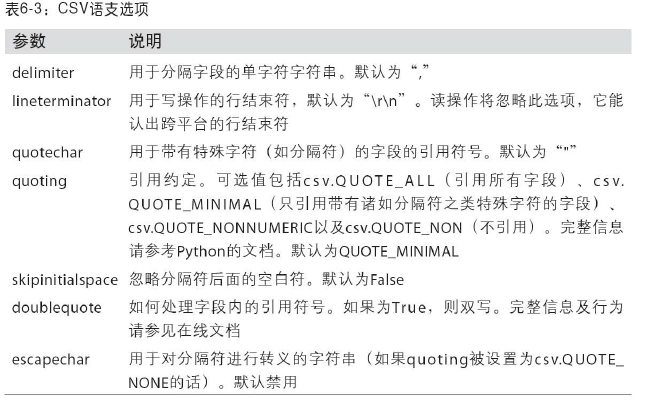

### JSON数据 

In [53]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [57]:
import json
#python对象 和 json格式的互相转化 loads\ dumps
result = json.loads(obj)
asjson = json.dumps(result)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [58]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [59]:
!type examples\example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [61]:
data = pd.read_json('examples/example.json')
print(data.to_json())
print(data.to_json(orient='records'))
data

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}
[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


### XML和HTML:Web信息收集

In [63]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')#可以放一个html文件路径/url
print(len(tables))
failures = tables[0]
failures.head()

1


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [64]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, dtype: int64

#### 利用lxml.objectify解析XML 

In [65]:
from lxml import objectify

path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [67]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [68]:
perf = pd.DataFrame(data)
perf.head()

,AGENCY_NAME,CATEGORY,DESCRIPTION,FREQUENCY,INDICATOR_NAME,INDICATOR_UNIT,MONTHLY_ACTUAL,MONTHLY_TARGET,PERIOD_MONTH,PERIOD_YEAR,YTD_ACTUAL,YTD_TARGET
0,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,1,2008,96.9,95
1,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95,95,2,2008,96,95
2,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,3,2008,96.3,95
3,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,98.3,95,4,2008,96.8,95
4,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95.8,95,5,2008,96.6,95


In [69]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [71]:
print(root)
print(root.get('href'))
print(root.text)

Google
http://www.google.com
Google


## 二进制数据格式 

In [73]:
frame = pd.read_csv('examples/ex1.csv')
frame.to_pickle('examples/frame_pickle') 
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [74]:
pd.read_pickle('examples/frame_pickle') #???只能读取pandas的对象嘛？python的dict能否用这个函数读取

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### HDF5格式 

In [79]:
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [80]:
#HDF5对象可以通过与字典一样的API获取
store['obj1']

,a
0,-0.976381
1,-0.189913
2,0.953936
3,0.468573
4,-0.262706
5,1.001427
6,0.855473
7,-0.402411
8,0.609800
9,0.268642


In [81]:
#HDFStore支持两种存储模式，'fixed'和'table。后者更慢但能支持使用特殊语法进行查询
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])

,a
10,-0.410743
11,0.638266
12,-0.520120
13,0.394141
14,-0.025087
15,0.565279


In [82]:
store.close()

In [83]:
frame.to_hdf('mydata.h5', 'obj3', format='table')
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,-0.976381
1,-0.189913
2,0.953936
3,0.468573
4,-0.262706


如果要在本地处理海量数据，可以好好研究一下PyTables和h5py

In [85]:
os.remove('mydata.h5') #删除文件

### 读取excel

In [86]:
#读取一个文件中的多个表单，创建ExcelFile会更快
xlsx = pd.ExcelFile('examples/ex1.xlsx')
pd.read_excel(xlsx, 'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [87]:
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [88]:
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

In [89]:
frame.to_excel('examples/ex2.xlsx')

## Web APIs交互  

In [90]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

In [91]:
data = resp.json()
data[0]['title']

'Enhancement: The shift function should have an optional argument allowing to extend the dataframe i.e. for forecasts'

In [92]:
issues = pd.DataFrame(data, columns=['number', 'title',
                                     'labels', 'state'])
issues

,number,title,labels,state
0,27091,Enhancement: The shift function should have an...,[],open
1,27090,ENH: allow non-Tick offsets in index.round/cei...,[],open
2,27089,Anyone knows a free Transaction Language 1 (TL...,[],open
3,27088,BUG: Fix handling of ambiguous or nonexistent ...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
4,27087,"WIP: Add DayEnd, DayBegin Offsets (Help Wanted)",[],open
5,27086,TST: Add missing tests for loc slicing of Peri...,"[{'id': 2822098, 'node_id': 'MDU6TGFiZWwyODIyM...",open
6,27085,TST: Split test_offsets.py,"[{'id': 53181044, 'node_id': 'MDU6TGFiZWw1MzE4...",open
7,27084,DEPR: msgpack,"[{'id': 87485152, 'node_id': 'MDU6TGFiZWw4NzQ4...",open
8,27081,API: .equals for Extension Arrays,"[{'id': 35818298, 'node_id': 'MDU6TGFiZWwzNTgx...",open
9,27080,Bug in SparseArray.__array_ufunc__ for reduce,[],open


## 数据库交互 

In [93]:
import sqlite3
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""
con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit()

In [94]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [95]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [96]:
cursor.description
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [97]:
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
